In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
import json  
import warnings 
warnings.filterwarnings('ignore')

In [183]:
X_test = pd.read_csv("/Users/nandapop/Documents/Bootcamp/gradientBoosting/data/processed/X_test.csv")
X_train = pd.read_csv("/Users/nandapop/Documents/Bootcamp/gradientBoosting/data/processed/X_train.csv")
y_test = pd.read_csv ("/Users/nandapop/Documents/Bootcamp/gradientBoosting/data/processed/y_test.csv")
y_train = pd.read_csv("/Users/nandapop/Documents/Bootcamp/gradientBoosting/data/processed/y_train.csv")

Boosting Classification

Hyperparameter Tuning to optimize Gradient Boosting Algorithm

In [184]:
#Classification Model without Tuning

gb_model1 = GradientBoostingClassifier()
gb_model1.fit(X_train, y_train)

y_pred = gb_model1.predict(X_test)
accuracy_model1 = accuracy_score(y_test, y_pred)
print(f"Accuracy Gradient Boosting without Tuning : {accuracy_model1}")

Accuracy Gradient Boosting without Tuning : 0.796875


In [185]:
gb_model1= gb_model1.get_params()
with open('/Users/nandapop/Documents/Bootcamp/gradientBoosting/data/processed/GradientBoostingClassifier.json', 'w', encoding='utf-8') as json_file:
    json.dump(gb_model1, json_file)

In [186]:
#Hyperparameter Tuning using Grid Seach CV
gb_model2 = GradientBoostingClassifier(n_estimators=100, random_state=42)

parameters = {
    'max_depth': [3,5],
    'min_samples_leaf': [1,2,4],
    'learning_rate': [0.01, 0.05],
    'n_estimators' : [100]
}
gb_grid = GridSearchCV(
    gb_model2, parameters, cv = 5, scoring='f1_macro'
)
gb_grid.fit(X_train, y_train)

y_pred = gb_grid.best_estimator_.predict(X_test)

best_params = gb_grid.best_params_

accuracy_model2 = accuracy_score(y_test, y_pred)
print(f"Best parameters: {best_params}")
print(f"Accuracy using Grid Seach CV: {accuracy_model2}")

Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 4, 'n_estimators': 100}
Accuracy using Grid Seach CV: 0.7916666666666666


In [187]:
gb_model2= gb_model2.get_params()
with open('/Users/nandapop/Documents/Bootcamp/gradientBoosting/data/processed/GB_GridSearchCV_42.json', 'w', encoding='utf-8') as json_file:
    json.dump(gb_model2, json_file)

In [188]:
#Hyperparameter Tuning using Randomized Search CV
gb_model3 = GradientBoostingClassifier(random_state=42)
parameters = {
    'n_estimators': np.arange(50, 251, 50),
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'max_depth': np.arange(3, 8),
}
random_search = RandomizedSearchCV(estimator=gb_model3, param_distributions=parameters, n_iter=10,
                                   cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(X_train,y_train)

/Users/nandapop/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nandapop/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nandapop/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nandapop/Library/Python/3.8/lib/python/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expec

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': array([0.01      , 0.03111111, 0.05222222, 0.07333333, 0.09444444,
       0.11555556, 0.13666667, 0.15777778, 0.17888889, 0.2       ]),
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250])},
                   random_state=42, scoring='accuracy')

In [189]:
y_pred_best_random = random_search.best_estimator_.predict(X_test)
best_params_random = gb_grid.best_params_
accuracy_model3 = accuracy_score(y_test, y_pred_best_random)
print("Best Parameters (Randomized Search):", best_params_random)
print(f"Accuracy using Randomized Search CV: {accuracy_model3}")

Best Parameters (Randomized Search): {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 4, 'n_estimators': 100}
Accuracy using Randomized Search CV: 0.78125


In [190]:
gb_model3= gb_model3.get_params()
with open('/Users/nandapop/Documents/Bootcamp/gradientBoosting/data/processed/Randomized_search_cv_42.json', 'w', encoding='utf-8') as json_file:
    json.dump(gb_model3, json_file)

XGBoost

In [191]:
gb_model4 = XGBClassifier(random_state = 42, n_estimators=200,learning_rate=0.1, max_depth=4, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8)
gb_model4.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [192]:
y_pred_XGB = gb_model4.predict(X_test)
accuracy_model4 = accuracy_score(y_test, y_pred_XGB)
print(f"Accuracy XGB Model : {accuracy_model4}")
y_pred_XGB = f1_score(y_test, y_pred)
print(f"F1 Score using XGB: {y_pred_XGB}")
gb_model4.save_model("/Users/nandapop/Documents/Bootcamp/gradientBoosting/data/processed/KGBclassifier_42.json")

Accuracy XGB Model : 0.796875
F1 Score using XGB: 0.6875


XGB Regressor

In [193]:
gb_model5 = XGBRegressor(random_state = 42)
gb_model5.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [194]:
y_pred_XGB_r = gb_model5.predict(X_test)
y_pred_XGB_r
print(f"Mean squared error XGBRegressor: {mean_squared_error(y_test, y_pred)}")
gb_model5.save_model("/Users/nandapop/Documents/Bootcamp/gradientBoosting/data/processed/XGBRegressor.json")


Mean squared error XGBRegressor: 0.20833333333333334


AdaBoost

In [195]:
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
gb_model6 = AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=0)
gb_model6.fit(X, y)
gb_model6.predict([[0, 0, 0, 0]])
gb_model6.score(X, y)
accuracy_model6 = accuracy_score(y_test, y_pred)
print(f"Accuracy using AdaBoostClassifier: {accuracy_model6}")
gb_model6_f1 = f1_score(y_test, y_pred)
print(f"F1 Score using AdaBoostClassifier: {gb_model6_f1}")


Accuracy using AdaBoostClassifier: 0.7916666666666666
F1 Score using AdaBoostClassifier: 0.6875


In [196]:
gb_model6= gb_model6.get_params()
with open('/Users/nandapop/Documents/Bootcamp/gradientBoosting/data/processed/AdaBoostClassifier.json', 'w', encoding='utf-8') as json_file:
    json.dump(gb_model6, json_file)

In [197]:
cat_model7 = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_state=42, verbose=0)
cat_model7.fit(X_train, y_train)

y_pred_cat = cat_model7.predict(X_test)
accuracy_model7 = accuracy_score(y_test, y_pred_cat)
print(f"Accuracy using CatBoostClassifier: {accuracy_model7}")

Accuracy using CatBoostClassifier: 0.765625


In [198]:
gb_model7= cat_model7.get_params()
with open('/Users/nandapop/Documents/Bootcamp/gradientBoosting/data/processed/CatBoostClassifier_42.json', 'w', encoding='utf-8') as json_file:
    json.dump(gb_model7, json_file, indent=4)
    

In [233]:
accuracy_result = {
    "Gradient Boosting Classifier": accuracy_model1,
    "Gradient Boosting Classifier with Parameters ": accuracy_model2,
    "Gradient Boosting Classifier using RandomizedSearchCV": accuracy_model3, 
    "XGB Classifier": accuracy_model4,
    "AdaBoostClassifier": accuracy_model6,
    "CatBoostClassifier":accuracy_model6
    }
my_models = []
accuracies = []
for key, value in accuracy_result.items():
     my_models.append(key)
     accuracies.append(value)
     print(f"Model: {key}, Accuracy: {value:.3f}")

    

Model: Gradient Boosting Classifier, Accuracy: 0.797
Model: Gradient Boosting Classifier with Parameters , Accuracy: 0.792
Model: Gradient Boosting Classifier using RandomizedSearchCV, Accuracy: 0.781
Model: XGB Classifier, Accuracy: 0.797
Model: AdaBoostClassifier, Accuracy: 0.792
Model: CatBoostClassifier, Accuracy: 0.792


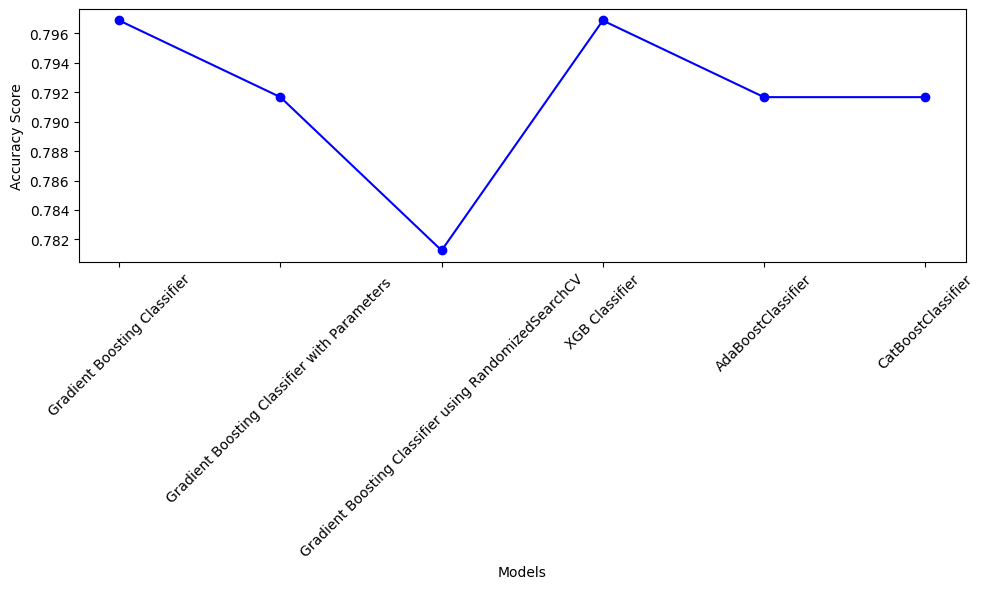

In [234]:
plt.figure(figsize=(10, 6))
plt.plot(my_models, accuracies, marker='o', linestyle='-', color='b')
plt.xticks(rotation=45)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.tight_layout()
plt.show()

The models Gradient Boosting and XGBoost have the best accuracy of 0.797